In [2]:
pip install tensorflow==2.4.1 gpflow==2.1.4 GPy cmdstanpy

     |████████████████████████████████| 255 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 394.4 MB 20 kB/s s eta 0:00:01     |█████████████▏                  | 161.6 MB 62.9 MB/s eta 0:00:04
     |████████████████████████████████| 3.8 MB 46.7 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 59.5 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 17.3 MB/s eta 0:00:01
     |████████████████████████████████| 995 kB 43.8 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 50.3 MB/s eta 0:00:01
  Created wheel for GPy: filename=GPy-1.9.9-cp38-cp38-linux_x86_64.whl size=2366227 sha256=fcad0d9cb5186c21d592b82578d315a3c79ae3619385760e97d3f0243f808610
  Stored in directory: /home/xiaoh2/.cache/pip/wheels/6f/42/43/fd9655711b8f8517ffc104cce1b49c7e3ab7bce6a88bb2f0fb
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102550 sha256=98ae8cd5153c08111cf36c9

In [1]:
import numpy as np
import tensorflow as tf
import gpflow
from gpflow.kernels import White, RBF
from gpflow.likelihoods import Gaussian
from deep_gp import DeepGP
import matplotlib.pyplot as plt
import pandas as pd
import cmdstanpy
cmdstanpy.install_cmdstan()

Installing CmdStan version: 2.26.0
Install directory: /home/xiaoh2/.cmdstan
Download successful, file: /tmp/tmp3eommcpb
Unpacked download as cmdstan-2.26.0
Building version cmdstan-2.26.0
Test model compilation
Installed cmdstan-2.26.0
deleting tmpfiles dir: /tmp/tmpsvg4g2qw
done



True

# Deep Gaussian Processes

-------------------

# Part 1 - Sampling From a Deep GP (worth 1 point)

#### You are provided with the following ingredients with which to build a GP model

In [2]:
np.random.seed(111)
N = 500
x = np.linspace(-20, 20, num=N)

gp_var = 1.0  # GP variance
gp_len = 1.0  # GP lengthscale

def rbf_kernel(x1, x2):
    x1 = x1.reshape(-1, 1, 1)
    x2 = x2.reshape(1, -1, 1)
    r = np.sum(x1 - x2, axis=-1)
    return gp_var * np.exp(-0.5 * np.square(r) / np.square(gp_len))


def zero_mean(X):
    return np.zeros_like(X.reshape(-1, ))


def identity_mean(X):
    return X.reshape(-1, )

**Task 1a**: Generate a sample from a 3-layer deep GP with **zero mean** and an **RBF kernel**. Use the inputs, x, and parameters given above. Plot the sample path and the covariance matrix in each layer.

**Do you notice any strange behaviour in the sample path and/or covariance matrix? Write a short explanation of the behaviour and why you think it may be occuring.**

hint 1: you can use np.random.multivariate_normal() to sample from a Gaussian distribution. ***Note: you may need to add a small value to the diagonal of the covariance matrix to prevent numerical issues during sampling, e.g. + 1e-10 * np.eye(N)***

hint 2: use plt.imshow() to plot a covariance matrix

hint 3: always plot the initial inputs, x, on the x-axis of the sample plots.
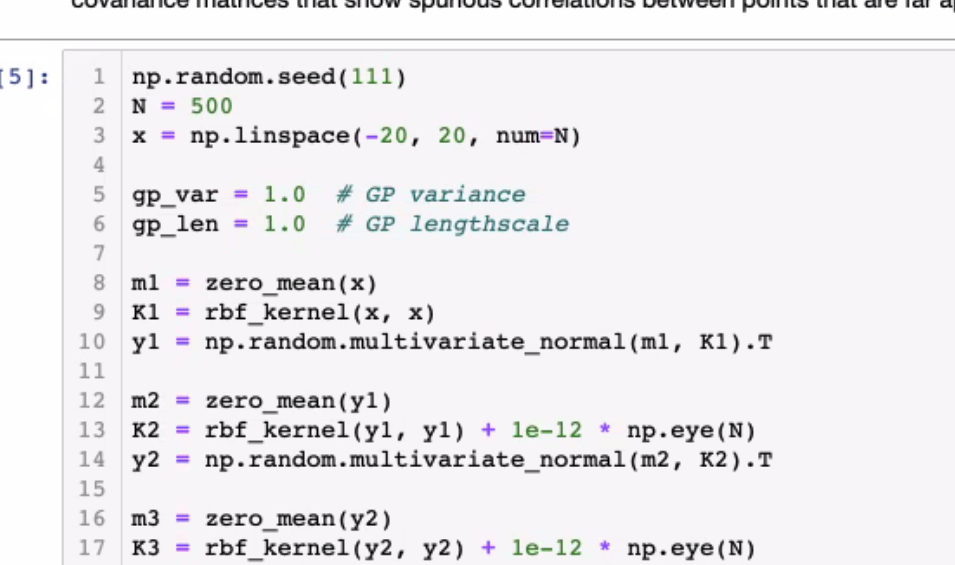

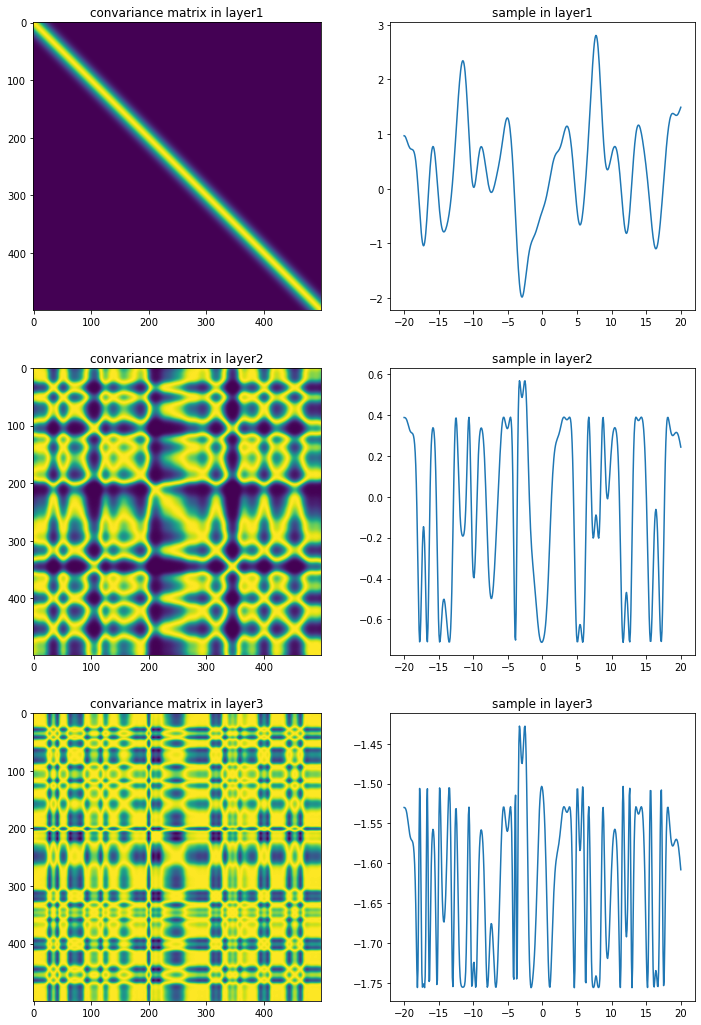

In [12]:
plt.figure(figsize=(12,18))
mean1=zero_mean(x)
conv1=rbf_kernel(x,x)
plt.subplot(321)
plt.title('convariance matrix in layer1')
plt.imshow(conv1)
f1=np.random.multivariate_normal(mean1,conv1,1)
plt.subplot(322)
plt.title('sample in layer1')
plt.plot(x,np.squeeze(f1))
mean2=zero_mean(f1)
conv2=rbf_kernel(f1,f1)
plt.subplot(323)
plt.title('convariance matrix in layer2')
plt.imshow(conv2)
f2=np.random.multivariate_normal(mean2,conv2,1)
plt.subplot(324)
plt.title('sample in layer2')
plt.plot(x,np.squeeze(f2))
mean3=zero_mean(f2)
conv3=rbf_kernel(f2,f2)
plt.subplot(325)
plt.title('convariance matrix in layer3')
plt.imshow(conv3)
f3=np.random.multivariate_normal(mean3,conv3,1)
plt.subplot(326)
plt.title('sample in layer3')
plt.plot(x,np.squeeze(f3))

## Strange things
As the covariance matrix shown, the dimensions are highly correlated, which results in the fluctuation within the same range overall. The deeper the layer, the more correlated among dimensions. This phenomenon results from zero means. In the first layer, only close dimensions are correlated. But due to zero means, each dimension is constrained with a range. And it improves the correlation among dimensions. As the iteration increases, the correlations among dimensions are gradually enhanced. 

Therefore, the values are restricted in a specific range and the frequency is improved.

**Task 1b**: Now generate a sample from a 3-layer deep GP, now with the **identity mean function for the first two layers**, and a **zero mean function for the final layer**. Plot the samples from each layer and the covariance matrices.

**Do you notice any differences in the behaviour between this sample and the previous one? Write a short explanation.**

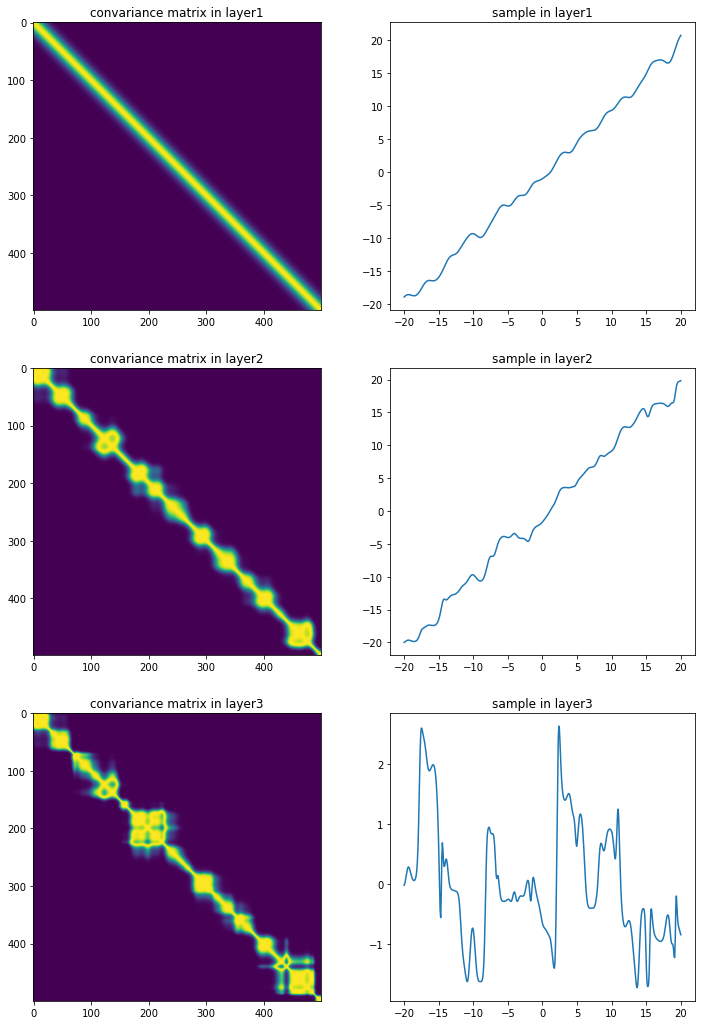

In [13]:
plt.figure(figsize=(12,18))
mean1=identity_mean(x)
conv1=rbf_kernel(x,x)
plt.subplot(321)
plt.title('convariance matrix in layer1')
plt.imshow(conv1)
f1=np.random.multivariate_normal(mean1,conv1,1)
plt.subplot(322)
plt.title('sample in layer1')
plt.plot(x,np.squeeze(f1))
mean2=identity_mean(f1)
conv2=rbf_kernel(f1,f1)
plt.subplot(323)
plt.title('convariance matrix in layer2')
plt.imshow(conv2)
f2=np.random.multivariate_normal(mean2,conv2,1)
plt.subplot(324)
plt.title('sample in layer2')
plt.plot(x,np.squeeze(f2))
mean3=zero_mean(f2)
conv3=rbf_kernel(f2,f2)
plt.subplot(325)
plt.title('convariance matrix in layer3')
plt.imshow(conv3)
f3=np.random.multivariate_normal(mean3,conv3,1)
plt.subplot(326)
plt.title('sample in layer3')
plt.plot(x,np.squeeze(f3))

The former one frequently fluctuate within a range with similar pattern, whereas this one has a more dynamic value pattern. This is due to the identity mean in the first two layers. With the identity means, most correlation among dimensions are preserved(only close dimensions are correlated.) The first two layers are used to find potential correlation with more dimensions but never go too far. The last layer applies zero means, which generates a more dynamic value pattern. Because the correleted dimensions are not that many.

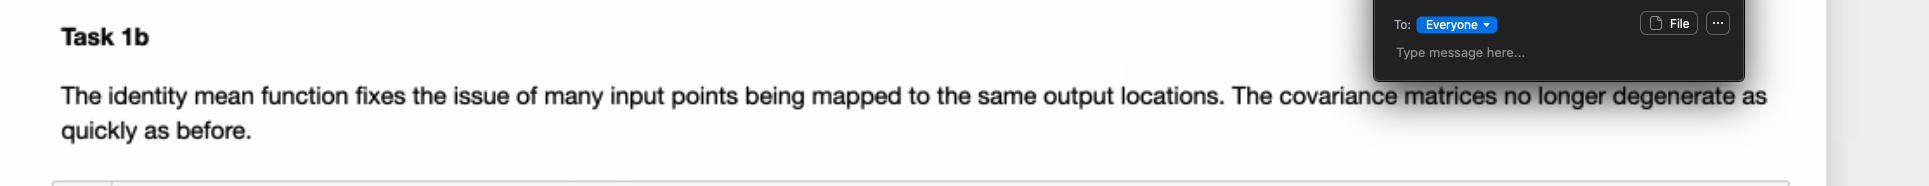

-----------------------

# Part 2 - Training a Deep GP (worth 1 point)

Here we generate some training data using the step function

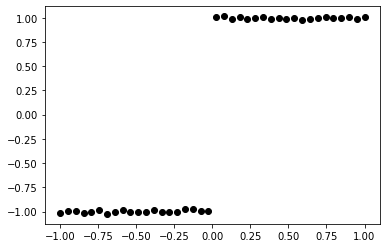

In [56]:
tf.random.set_seed(0)
np.random.seed(123)
N = 40
X_train = np.linspace(-1, 1, N)[:, None]
f_step = lambda x: -1 if x < 0 else 1.
Y_train = np.reshape([f_step(x) for x in X_train], X_train.shape) + np.random.randn(*X_train.shape) * 1e-2
Xs = np.linspace(-2., 2, 300)[:, None]  # test inputs
plt.scatter(X_train, Y_train, color='k');

**Task 2a:** The ELBO calculation has been removed from the deep GP implementation. **Implement the ELBO yourself using the derivation on slide 16 of the lecture.**

A custom deep GP class has been created below. You are only required to finish the implementation of the ELBO, using the ingredients given in the code comments.

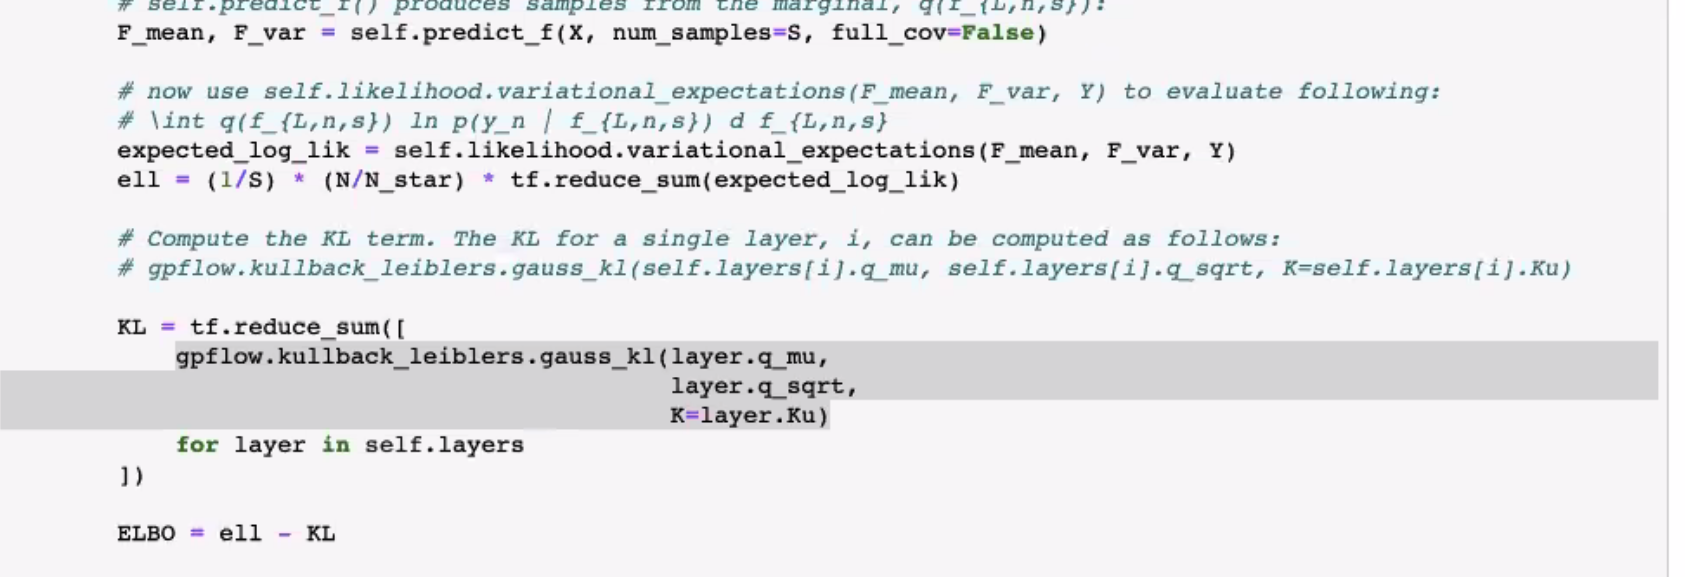

In [49]:
class MyDeepGP(DeepGP):

    def elbo(self, data):
        """
        Implement the ELBO here using the derivation on slide 16 of the lecture notes
        :param data: Tuple of two tensors for input data X and labels Y.
        :return: Tensor representing ELBO.
        """
        X, Y = data  # mini-batch data for the current training step
        N_star = X.shape[0]  # number of points in the mini-batch
        N = self.num_data  # total number of data points
        S = self.num_samples  # the number of samples used to evaluate the marginals, q(f_{L,n})
        
        ############################################
        ######### Implement the ELBO here ##########
        ############################################
        
        # You will need the following ingredients:
        
        # self.predict_f() produces samples from the marginal, q(f_{L,n,s}):
        F_mean, F_var = self.predict_f(X, num_samples=S, full_cov=False)
        
        # now use self.likelihood.variational_expectations(F_mean, F_var, Y) to evaluate following:
        # \int q(f_{L,n,s}) ln p(y_n | f_{L,n,s}) d f_{L,n,s}
        term1=tf.reduce_sum(self.likelihood.variational_expectations(F_mean, F_var, Y))
        term1=term1*N/(S*N_star)
        # Compute the KL term. The KL for a single layer, i, can be computed as follows:
        # gpflow.kullback_leiblers.gauss_kl(self.layers[i].q_mu, self.layers[i].q_sqrt, K=self.layers[i].Ku)
        term2=0
        for i in range(3):
            term2+=gpflow.kullback_leiblers.gauss_kl(self.layers[i].q_mu, self.layers[i].q_sqrt, K=self.layers[i].Ku)
        ELBO=term1-term2
        
        return ELBO

Now train the model and plot the posterior by running the following code (no modification needed):

iter 100, ELBO: -75.1649
iter 200, ELBO: -65.0701
iter 300, ELBO: -59.0484
iter 400, ELBO: -45.4110
iter 500, ELBO: -23.1820
iter 600, ELBO: 0.1608
iter 700, ELBO: -8.4843
iter 800, ELBO: 22.7607
iter 900, ELBO: 25.4416
iter 1000, ELBO: 13.6023
iter 1100, ELBO: 37.8512
iter 1200, ELBO: 43.6785
iter 1300, ELBO: 32.1600
iter 1400, ELBO: 48.0383
iter 1500, ELBO: -143.1263
iter 1600, ELBO: 21.7259
iter 1700, ELBO: 36.1845
iter 1800, ELBO: 38.7987
iter 1900, ELBO: 41.1607
iter 2000, ELBO: 45.0736
iter 2100, ELBO: 50.8249
iter 2200, ELBO: 54.3647
iter 2300, ELBO: 54.7589
iter 2400, ELBO: 57.4554
iter 2500, ELBO: 57.4548
iter 2600, ELBO: 56.5078
iter 2700, ELBO: 57.7958
iter 2800, ELBO: 21.3698
iter 2900, ELBO: 45.2134
iter 3000, ELBO: 43.5943
iter 3100, ELBO: 43.6237
iter 3200, ELBO: 51.8569
iter 3300, ELBO: 56.5981
iter 3400, ELBO: 60.0461
iter 3500, ELBO: 60.7340
iter 3600, ELBO: 62.7390
iter 3700, ELBO: 62.8228
iter 3800, ELBO: 65.2190
iter 3900, ELBO: 47.1637
iter 4000, ELBO: 63.9228
ite

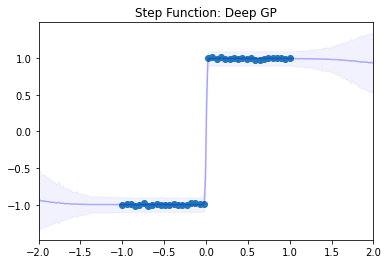

In [50]:
## Helper functions used to build and train the deep GP

def make_deep_GP(num_layers, X, Y, Z):
    kernels = []
    layer_sizes = []
    for l in range(num_layers):
        kernel = RBF(lengthscales=0.2, variance=1.0) + White(variance=1e-4)#moving the noise into the kernel
        kernels.append(kernel)
        layer_sizes.append(1)

    dgp = MyDeepGP(X, Y, Z, kernels, layer_sizes, Gaussian(variance=1), num_samples=20)

    # init hidden layers to be near deterministic
    for layer in dgp.layers[:-1]:
        layer.q_sqrt.assign(layer.q_sqrt * 1e-2)
    return dgp


@tf.function()
def training_step(model, opt):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        tape.watch(model.trainable_variables)
        obj = -model.elbo((X_train, Y_train))
        gradients = tape.gradient(obj, model.trainable_variables)
    opt.apply_gradients(zip(gradients, model.trainable_variables))
    return obj




## Now train the model and plot the result

M = 20  # num inducing points
num_layers = 3  # number of layers
Z_init = np.random.uniform(-1, 1, M)[:, None]
dgp = make_deep_GP(num_layers, X_train, Y_train, Z_init)
optimizer = tf.optimizers.Adam(learning_rate=0.01, epsilon=1e-08)

num_iters = 5000

for it in range(1, num_iters + 1):
    objective = training_step(dgp, optimizer)
    if np.mod(it, 100) == 0:
        print('iter %2d, ELBO: %1.4f' % (it, -objective.numpy()))

m_test, v_test = dgp.predict_y(Xs, num_samples=1000)
m_test, v_test = tf.reduce_mean(m_test, axis=0), tf.reduce_mean(v_test, axis=0)
lb = m_test[:, 0] - 1.96 * v_test[:, 0] ** 0.5
ub = m_test[:, 0] + 1.96 * v_test[:, 0] ** 0.5

plt.plot(Xs, m_test, color='b', alpha=0.3)
plt.fill_between(Xs[:, 0], lb, ub, color='b', alpha=0.05, label='95% confidence')
plt.xlim(min(Xs), max(Xs))

plt.title('Step Function: Deep GP')
plt.scatter(X_train, Y_train);

**Task 2b:** Plot the model output from each layer. **Write a brief explanation of what role you think each layer is playing in inference.**

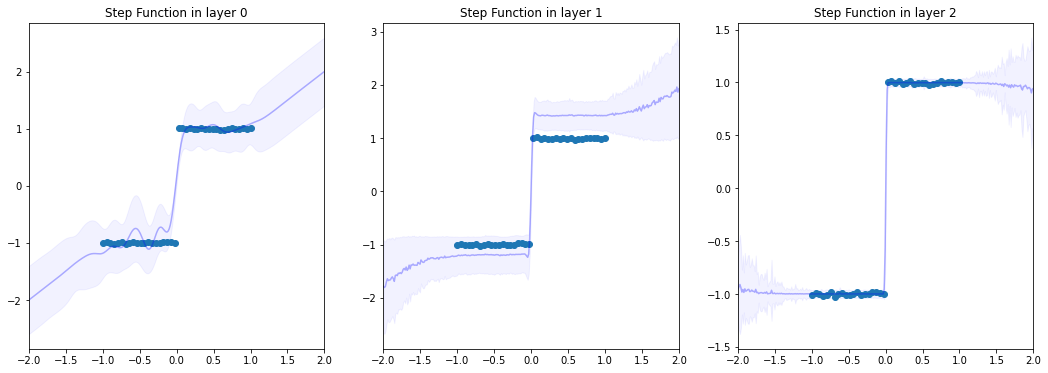

In [62]:
# Prediction in the deep GP is also done via sampling 
# The following code produces 50 predictive samples from each layer.
_, layers_means, layers_variances = dgp.predict_all_layers(Xs, num_samples=50, full_cov=False)
# You can get a good estimate of the posterior predictive mean and variance by taking the mean of the samples.
plt.figure(figsize=(18,6))
for i in range(num_layers):
    mean=layers_means[i]
    var=layers_variances[i]
    m_test, v_test = tf.reduce_mean(mean, axis=0), tf.reduce_mean(var, axis=0)
    lb = m_test[:, 0] - 1.96 * v_test[:, 0] ** 0.5
    ub = m_test[:, 0] + 1.96 * v_test[:, 0] ** 0.5
    plt.subplot2grid((1,3),(0,i))
    plt.plot(Xs, m_test, color='b', alpha=0.3)
    plt.fill_between(Xs[:, 0], lb, ub, color='b', alpha=0.05, label='95% confidence')
    plt.xlim(min(Xs), max(Xs))
    
    plt.title('Step Function in layer {}'.format(i))
    plt.scatter(X_train, Y_train);

The first layer is used to fit data and find out the potential correlation among dimensions. The second layer futher investigates the correlation. As the layer increases, the non-local correlation will be further explored. The last layer will use zero means, which still explores the correlation and fit the data. The reason that it uses zero mean is that the model doesn't need to explore the correlation of original inputs.

# Part 3: Model inference of lecture 9 (worth 2 points)

**Task 3**: Pick some small data set (or a subset of a big data set). Study a GP model of your own choosing, where the latent values can't be integrated out analytically. 

Examples (See Lecture 9):
- normal(mu,exp(eta)), mu ~ GP, eta ~ GP
  e.g. https://avehtari.github.io/casestudies/Motorcycle/motorcycle.html
- increasing magnitude model
  e.g. https://avehtari.github.io/casestudies/Birthdays/birthdays.html
- non-normal observation model, like Bernoulli, Poisson or negative-binomial
  e.g. http://avehtari.github.io/BDA_R_demos/demos_rstan/trafficdeaths.html

You may use any software you like (Stan, gpflow, gpytorch), and you may use full MCMC or
integrate over latent values using Laplace, EP or VI.

**Write a short report**:
1. describe your model and approach
2. what are optimized parameters vs. posterior of parameters
3. show predictive distribution with optimization vs. posterior predictive

For those familiar with GPflow, see
https://gpflow.readthedocs.io/en/develop/notebooks/advanced/mcmc.html#Example-3:-Fully-Bayesian-inference-for-generalized-GP-models-with-HMC

For those familiar with PyMC3, see
https://docs.pymc.io/notebooks/GP-Latent.html

**Hint**:
- Check the Lecture 9 video
- Studying the motorcycle casestudy is a good starting point
- If you have questions, check the course Slack channel https://join.slack.com/t/gp2021e4075/shared_invite/zt-l0x4rfc5-go1vZngUsvq9ix9wdMQAIQ

## Motivation

Stock market data can be interesting to analyze and as a further incentive, strong predictive models can have large financial payoff. In this exercise, I would like to model the highest stock price for 'AABA' to look for the most profitable strategy. If the proposed model could fit the data well, then it is promising to use it for some financial suggestions.

## Data Description

The data used in this part is the stock price of 'AABA', which is public on Kaggle(https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231).

**Data Format**

Date - in format: yy-mm-dd

Open - price of the stock at market open (this is NYSE data so all in USD)

High - Highest price reached in the day

Low - Lowest price reached in the day

Close - price at the end of the day

Volume - Number of shares traded

Name - the stock's ticker name

In [2]:
data=pd.read_csv('data.csv')
highest_price=data['High']
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


## Data Visualization

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


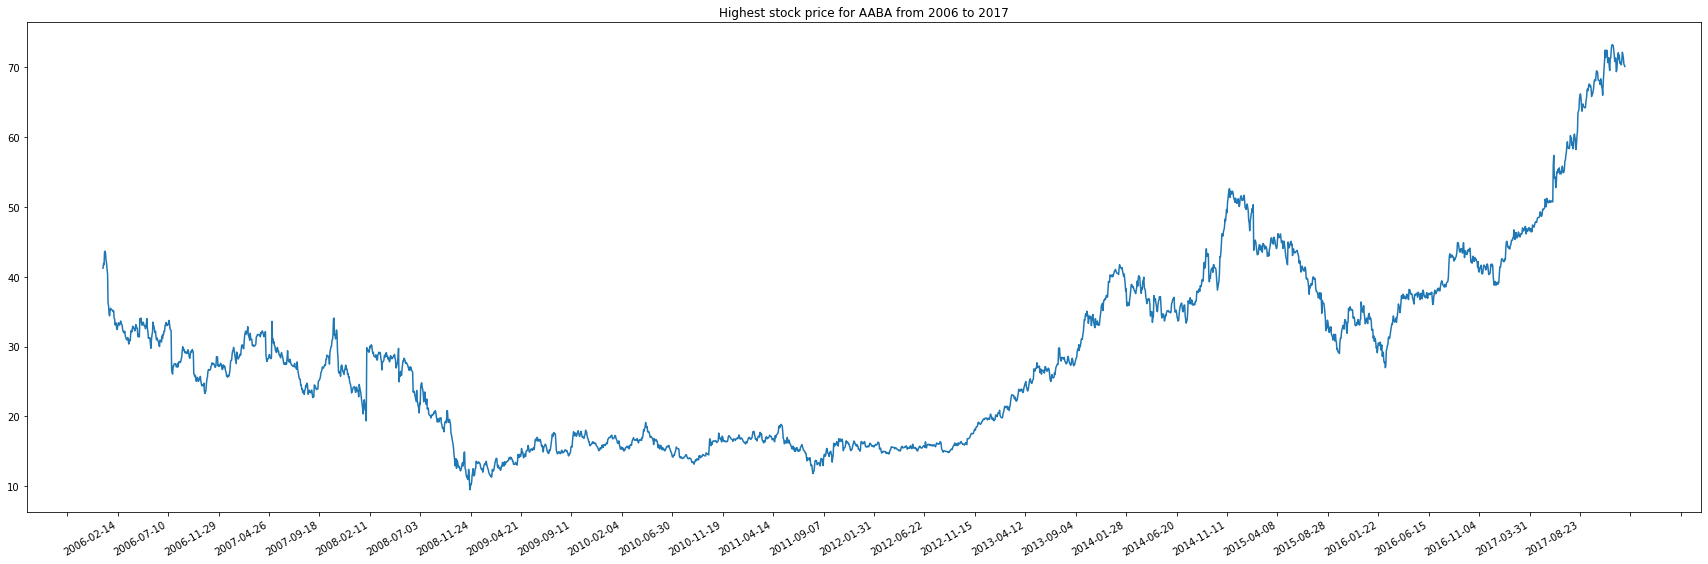

In [3]:
# plot the highest price
import matplotlib.dates as mdates
plt.figure(figsize=(30,10))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(data['Date'],data['High'])
plt.gcf().autofmt_xdate()
plt.title('Highest stock price for AABA from 2006 to 2017')
plt.show()

## Model Description

The model is 

$$ y \sim normal(f(x),\sigma_i)$$

where 

$$f=intercept+f_1$$
$$intercept \sim normal(0,1)$$
$$f_1 \sim GP(0,K_1)$$
$$\sigma_i \sim normal(0,5)$$

In this model, Hibert space basis function is applied in the Gaussian process and GP has exponentiated quadratic covariance function.

Here, I sample $f_1$ from a Gaussian process and add a intercept to get $f$, then I assume the price should be some values around $f$ with the uncertainty $\sigma_i$

In [57]:

from cmdstanpy import cmdstan_path, CmdStanModel
N=data.shape[0]
x=list(range(N))
#load model
model=CmdStanModel(stan_file='stock.stan')
model_data=dict(
    N=N,
    x=x,
    y=data['High'].to_numpy(),
    c_f=1.5,
    M_f=10,
)

INFO:cmdstanpy:compiling stan program, exe file: /notebooks/assignment5/stock
INFO:cmdstanpy:compiler options: stanc_options={'include_paths': ['/notebooks/assignment5']}, cpp_options=None
INFO:cmdstanpy:compiled model file: /notebooks/assignment5/stock


### Parameters after Optimization

In [58]:
opt=model.optimize(model_data,output_dir='./')
opt.optimized_params_pd.loc[:,['lengthscale_f','sigma_f','intercept']]

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


,lengthscale_f,sigma_f,intercept
0,0.331914,1.30935,1.17801


In [59]:
opt.optimized_params_pd.loc[:, opt.optimized_params_pd.columns.to_series().str.startswith("sigma_y")]

,sigma_y[1],sigma_y[2],sigma_y[3],sigma_y[4],sigma_y[5],sigma_y[6],sigma_y[7],sigma_y[8],sigma_y[9],sigma_y[10],...,sigma_y[3010],sigma_y[3011],sigma_y[3012],sigma_y[3013],sigma_y[3014],sigma_y[3015],sigma_y[3016],sigma_y[3017],sigma_y[3018],sigma_y[3019]
0,0.51091,0.572289,0.546057,0.683439,0.711502,0.684145,0.612457,0.598368,0.533545,0.484836,...,0.682759,0.699443,0.662858,0.718341,0.794353,0.759654,0.715472,0.650345,0.639438,0.616126


### Posterior predictive checking

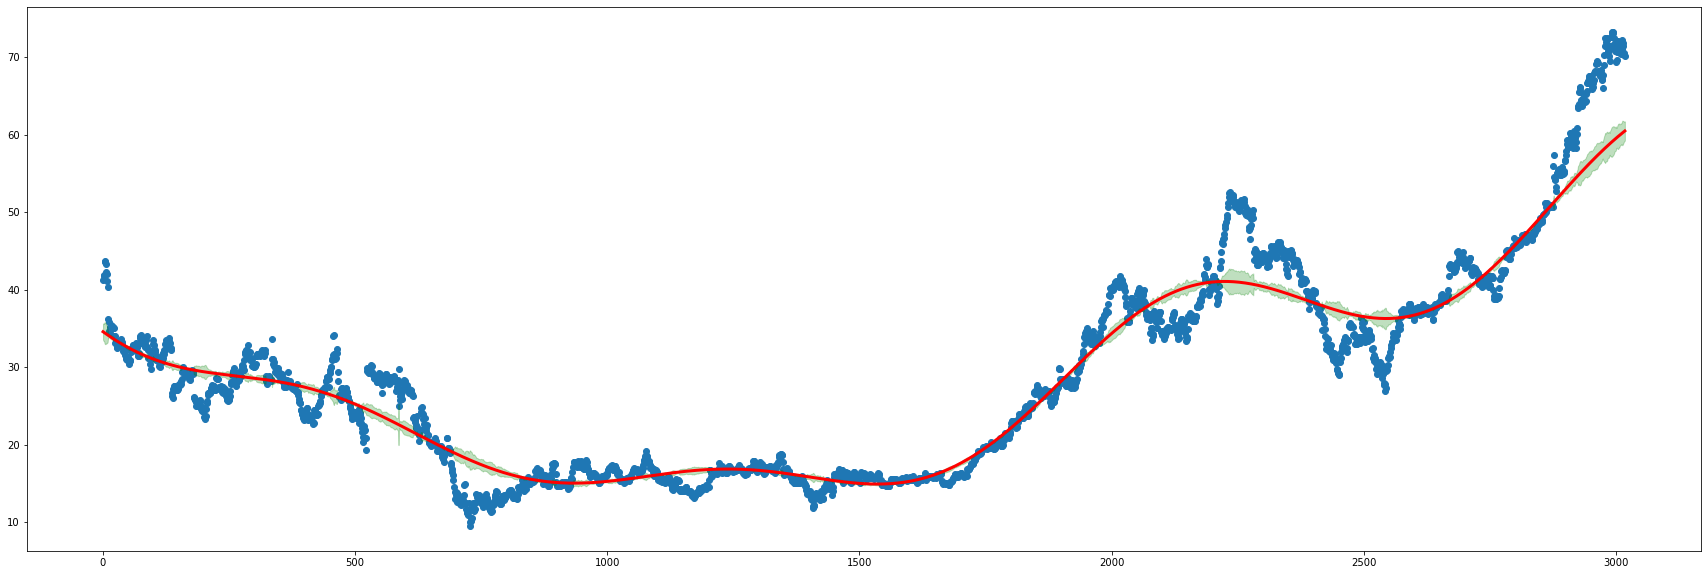

In [60]:
x=list(range(data.shape[0]))
plt.figure(figsize=(30,10))
plt.scatter(x,data['High'])

opt_mean=opt.optimized_params_pd.filter(regex='^f\[*').values.ravel()
opt_std=opt.optimized_params_pd.filter(regex='^sigma_y').values.ravel()

plt.plot(x,opt_mean,color='red',linewidth=3)
plt.fill_between(x, opt_mean - 2*opt_std, opt_mean + 2*opt_std, color='g', alpha=0.25, label='Confidence')

The result is not exactly accurate but the model could capture the overall price trend. However, the uncertainty is extremely small which degrades the performance.

### MCMC sampling

In [37]:
fit=model.sample(data=model_data)
draw=fit.draws_pd()
draw

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,intercept,beta_f[1],beta_f[2],...,f[3010],f[3011],f[3012],f[3013],f[3014],f[3015],f[3016],f[3017],f[3018],f[3019]
0,-813.005,0.963052,0.000188,10.0,1023.0,0.0,2303.99,1.02665,-1.27498,-1.61322,...,71.9629,72.1018,72.2406,72.3793,72.5180,72.6566,72.7951,72.9335,73.0719,73.2102
1,-806.437,0.790128,0.000188,10.0,1023.0,0.0,2366.97,1.05202,-1.28846,-1.58782,...,72.1042,72.2445,72.3847,72.5249,72.6650,72.8051,72.9450,73.0849,73.2247,73.3645
2,-804.138,0.865382,0.000188,10.0,1023.0,0.0,2327.23,1.04014,-1.29680,-1.60940,...,71.9149,72.0534,72.1919,72.3303,72.4686,72.6069,72.7450,72.8831,73.0211,73.1591
3,-804.897,0.676782,0.000188,10.0,1023.0,0.0,2297.74,1.01841,-1.26521,-1.62143,...,71.9947,72.1336,72.2724,72.4112,72.5499,72.6885,72.8271,72.9656,73.1040,73.2423
4,-806.281,0.956157,0.000188,10.0,1023.0,0.0,2277.57,1.05343,-1.34067,-1.63498,...,71.9263,72.0648,72.2032,72.3416,72.4799,72.6181,72.7562,72.8943,73.0322,73.1701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-826.260,0.952718,0.000300,10.0,1023.0,0.0,2336.14,1.47833,-1.53935,-1.31172,...,72.5708,72.7172,72.8637,73.0101,73.1565,73.3029,73.4493,73.5957,73.7420,73.8883
3996,-823.657,0.989911,0.000300,10.0,1023.0,0.0,2342.69,1.45533,-1.49429,-1.30097,...,72.6388,72.7852,72.9315,73.0778,73.2242,73.3705,73.5167,73.6630,73.8092,73.9554
3997,-796.076,0.998427,0.000300,10.0,1023.0,0.0,2233.87,1.48497,-1.56417,-1.32745,...,72.5931,72.7398,72.8865,73.0333,73.1800,73.3266,73.4733,73.6200,73.7666,73.9132
3998,-808.204,0.976907,0.000300,10.0,1023.0,0.0,2421.90,1.41101,-1.45206,-1.30941,...,72.6121,72.7578,72.9035,73.0493,73.1950,73.3406,73.4863,73.6319,73.7776,73.9231


### Parameters after MCMC sampling

In [38]:
summary=fit.summary()
summary.loc[['lengthscale_f','sigma_f','intercept'],:]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lengthscale_f,0.4,0.00,0.10,0.20,0.4,0.4,2.2,0.0000,4.4
sigma_f,1.6,0.10,0.20,1.30,1.5,1.9,2.5,0.0000,2.6
intercept,1.1,0.26,0.48,0.24,1.1,1.8,3.3,0.0015,2.1


In [49]:
summary.loc[summary.index.to_series().str.startswith("sigma_y"),:]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
sigma_y[1],2.9,0.40,2.3,0.470,2.20,7.6,34.0,0.0160,1.1
sigma_y[2],2.7,0.34,2.1,0.440,2.00,7.3,39.0,0.0180,1.1
sigma_y[3],2.3,0.45,2.2,0.310,1.60,6.7,25.0,0.0120,1.2
sigma_y[4],2.3,0.29,2.0,0.460,1.70,6.4,47.0,0.0220,1.1
sigma_y[5],2.8,0.50,2.2,0.540,2.10,7.3,20.0,0.0096,1.1
...,...,...,...,...,...,...,...,...,...
sigma_y[3015],1.2,0.45,1.8,0.059,0.43,4.9,17.0,0.0078,1.2
sigma_y[3016],1.3,0.27,1.7,0.053,0.65,4.6,38.0,0.0180,1.1
sigma_y[3017],1.5,0.27,2.0,0.094,0.63,5.8,53.0,0.0250,1.1


The parameters got by MCMC are quite clost to those from optimization except sigma_y. The sigma_y are more accurate than the optimized ones.

### MCMC Diagnose

In [88]:
fit.diagnose()

INFO:cmdstanpy:Processing csv files: /tmp/tmpaovfucpq/stock-202102131659-1-4jho09oe.csv, /tmp/tmpaovfucpq/stock-202102131659-2-zp9xyhl9.csv, /tmp/tmpaovfucpq/stock-202102131659-3-sz71wbxt.csv, /tmp/tmpaovfucpq/stock-202102131659-4-v5a8uffk.csv

Checking sampler transitions treedepth.
1803 of 4000 (45%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.


'Processing csv files: /tmp/tmpaovfucpq/stock-202102131659-1-4jho09oe.csv, /tmp/tmpaovfucpq/stock-202102131659-2-zp9xyhl9.csv, /tmp/tmpaovfucpq/stock-202102131659-3-sz71wbxt.csv, /tmp/tmpaovfucpq/stock-202102131659-4-v5a8uffk.csv\n\nChecking sampler transitions treedepth.\n1803 of 4000 (45%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.\nTrajectories that are prematurely terminated due to this limit will result in slow exploration.\nFor optimal performance, increase this limit.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory for all transitions.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.'

### Posterior predictive checking

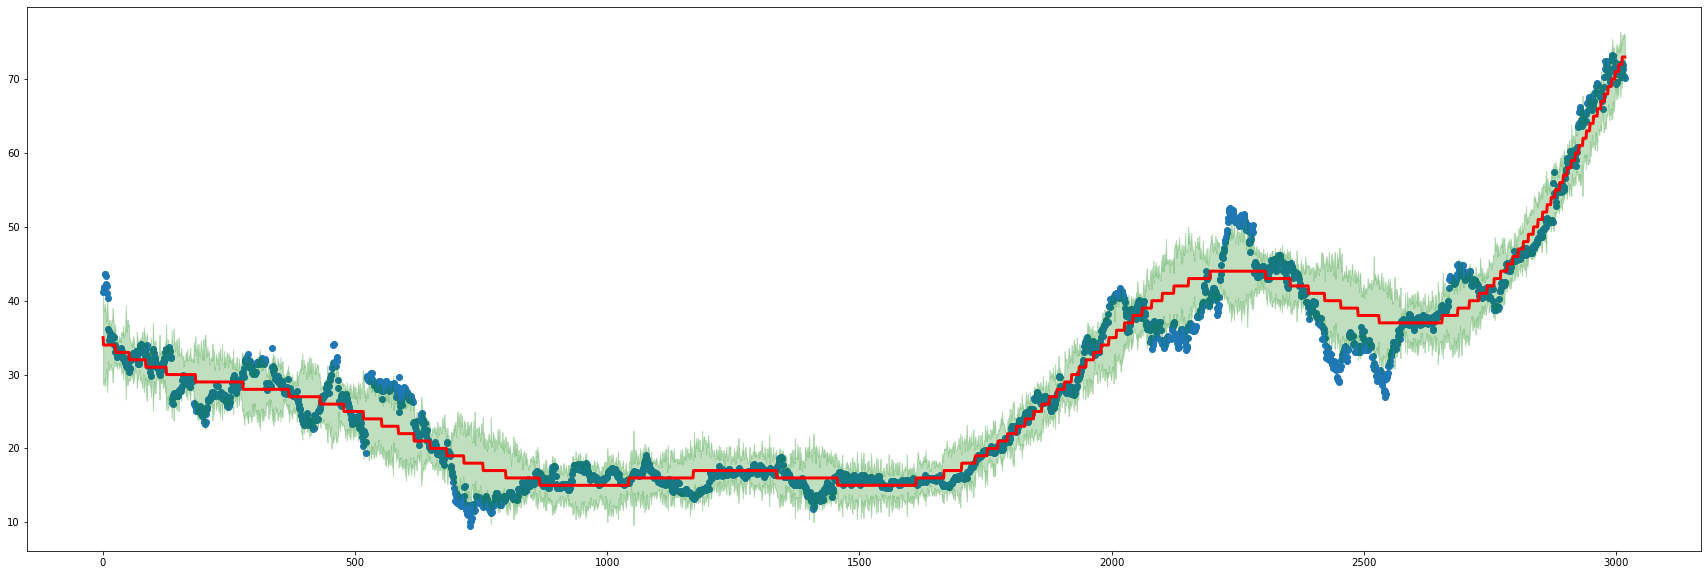

In [42]:
ypred=[]
ystd=[]
for i in range(N):
    ypred.append(summary.loc['f[{}]'.format(i+1),'Mean'])
    ystd.append(summary.loc['sigma_y[{}]'.format(i+1),'Mean'])
ypred=np.array(ypred)
ystd=np.array(ystd)
plt.figure(figsize=(30,10))
plt.scatter(x,data['High'])
plt.plot(x,ypred,color='red',linewidth=3)
plt.fill_between(x, ypred - 2*ystd, ypred + 2*ystd, color='g', alpha=0.25, label='Confidence')

### Comparison between Optimization prediction and MCMC prediction

Text(0, 0.5, 'Prediction from Optimizing')

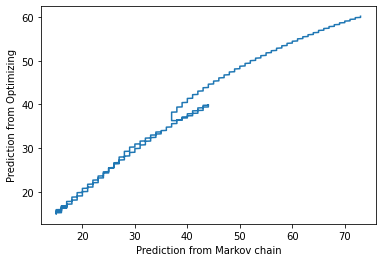

In [48]:
plt.plot(ypred,opt_mean)
plt.xlabel('Prediction from Markov chain')
plt.ylabel('Prediction from Optimizing')

From the plot, we can see the posterior predictive estimates are quite similar for these two methods(Optimization and MCMC). But from the uncertainty, the MCMC is much better because it could capture the uncertainty.

## Conclusion

From the plots above, we can see that the proposed model could roughly capture the price trend, which provides us some suggestions to some extent. Future works are clear, including trying covariance matrices, studying yearly, monthly, weekly trends and some other factors. In a word, more attempts are needed to make the model more accurate.

Also, the optimization has a faster speed to get the optimal parameters for this model. But it cannot capture the uncertainty of data. Therefore, it is a tradeoff between accuracy and speed.